# ECE 657A Assignment 1
## student: Renhuan He  ID：20804120

# Question 1

In [26]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import dataset
from sklearn.datasets import load_iris
iris=load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print (iris['target_names'])
iris_X = iris.data
iris_y = iris.target
print(iris_X[:5], '\n\n',iris_y)

['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
iris_df['species'] = iris['target']
dic = {0:'setosa', 1:'versicolor',2:'virginica'}
iris_df['species'] = iris_df['species'].map(dic)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


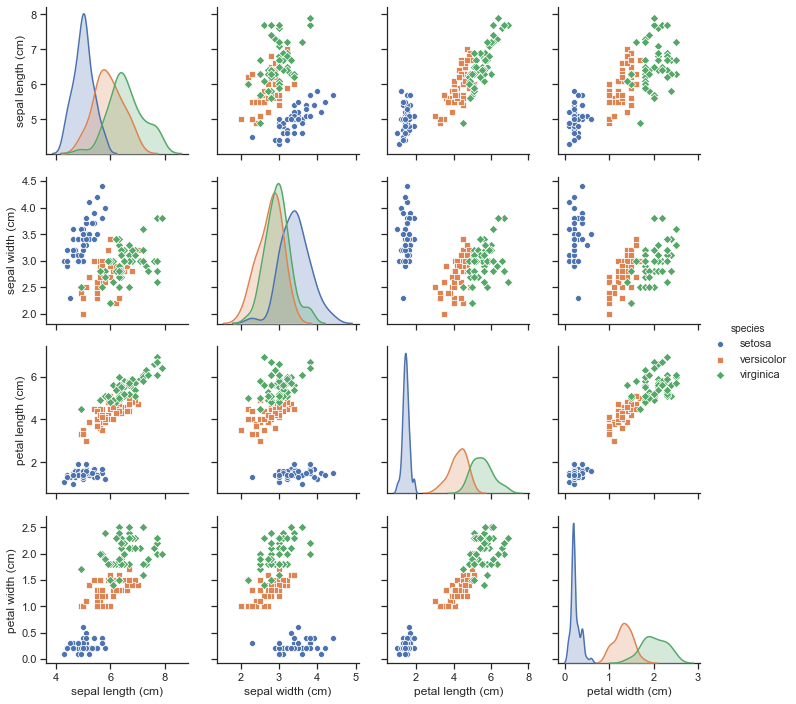

In [28]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris_df,hue="species",vars=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"],
             markers=["o", "s", "D"])

## describe in words your interpretation of the separability of the three classes in terms of different features (dimensions).

* In terms of sepal length and sepal width, setosa is well separated while versicolor and virginica are overlapping heavily. When comparing sepal length versus petal length and petal width, setosa is perfectly separated but versicolor and virginica are partially overlapping.Smilarly, setosa is always perfectly separated while versicolor and virginica are partially overlapping when comparing sepal width with petal length and petal width. Same separability happens in terms of petal length and petal width.

* From the scatter plot matrix, we could tell that setosa is well separated while versicolor and virginica are partially overlapping in evey cases of features comparing. So in conclusion a classifier using those four features could be able to classify the various flower types relatively well.

# Question 2 :KNN

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
x=iris.data
y=iris.target
#1.split data into train, validation and test sets
x_train, x_test2, y_train, y_test2=train_test_split(x, y, test_size=0.2, random_state=42)
x_train2, x_val2, y_train2, y_val2=train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [3]:
#2. knn
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(x_train2, y_train2)
a1=knn.score(x_test2, y_test2)
print(a1)

0.9666666666666667


[0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


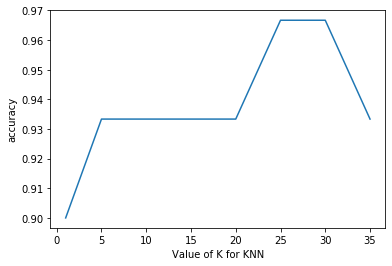

In [4]:
#3.find the best parameters
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = [1,5,10,15,20,25,30,35]
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train2, y_train2)
    scores =knn.score(x_val2, y_val2)
    k_scores.append(scores)

print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('accuracy')
plt.show()

According to the plot above, when k=25 and 30, the knn model has highest accuracy. Now let's compare two models between k=25 and k=30 to figure out which is better.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn25 = KNeighborsClassifier(n_neighbors=25).fit(x_train2, y_train2)
print('Accuracy of KNN classifier on training set when n=25 : {:.5f}'
     .format(knn25.score(x_train2, y_train2)))
print('Accuracy of KNN classifier on test set when n=25: {:.5f}'
     .format(knn25.score(x_test2, y_test2)))

knn30 = KNeighborsClassifier(n_neighbors=30).fit(x_train2, y_train2)
print('Accuracy of KNN classifier on training set when n=30 : {:.5f}'
     .format(knn30.score(x_train2, y_train2)))
print('Accuracy of KNN classifier on test set when n=30: {:.5f}'
     .format(knn30.score(x_test2, y_test2)))

Accuracy of KNN classifier on training set when n=25 : 0.93333
Accuracy of KNN classifier on test set when n=25: 1.00000
Accuracy of KNN classifier on training set when n=30 : 0.92222
Accuracy of KNN classifier on test set when n=30: 1.00000


According to the accuracy result on both train set and test set when k=25 and k=30, we can find out when n=25, the accuracy 
difference between train set and test set is smaller. So k=25 is the best parameter.

In [6]:
#4.try the best parameter
from sklearn.neighbors import KNeighborsClassifier

bestknn = KNeighborsClassifier(n_neighbors=25).fit(x_train2, y_train2)
print('Accuracy of KNN classifier on training set: {:.5f}'
     .format(bestknn.score(x_train2, y_train2)))
print('Accuracy of KNN classifier on test set: {:.5f}'
     .format(bestknn.score(x_test2, y_test2)))

Accuracy of KNN classifier on training set: 0.93333
Accuracy of KNN classifier on test set: 1.00000


The best k parameter for the KNN classifier is 25, and the accuracy of the model is 93.33% on the training set and is 100% on the test set.

# Question 3: SVM

[0.9575757575757576, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9423076923076923, 0.933974358974359]


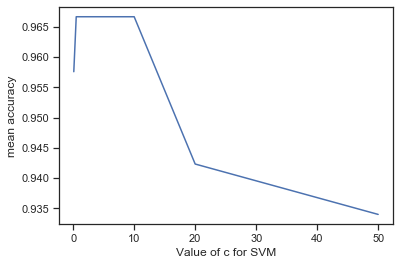

In [62]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import  matplotlib.pyplot as plt

iris = load_iris()
x=iris.data
y=iris.target
x_train3, x_test3, y_train3, y_test3=train_test_split(x, y, test_size=0.2, random_state=42)
c_range=[0.1, 0.5, 1, 2, 5, 10, 20, 50]
c_score=[]

for c in c_range:
    sclf = svm.SVC(kernel='linear',C=c)
    sclf.fit(x_train3, y_train3)
    scores=cross_val_score(sclf,x_train3, y_train3,cv=10)
    c_score.append(scores.mean())

print(c_score)

plt.plot(c_range, c_score)
plt.xlabel('Value of c for SVM')
plt.ylabel('mean accuracy')
plt.show()

From 10-fold cross validation test results above, we could find that When c= 2/5/10 the mean accuracy is highest. Now we could compare their accuracy on train set and test set both.

In [45]:
from sklearn import svm

svmclf2 = svm.SVC(kernel='linear', C=2).fit(x_train3, y_train3)
print('Accuracy of Linear SVM classifier on training set when c=2: {:.5f}'
     .format(svmclf2.score(x_train3, y_train3)))
print('Accuracy of Linear SVM classifier on test set when c=2: {:.5f}'
     .format(svmclf2.score(x_test3, y_test3)))

svmclf5 = svm.SVC(kernel='linear', C=5).fit(x_train3, y_train3)
print('Accuracy of Linear SVM classifier on training set when c=5: {:.5f}'
     .format(svmclf5.score(x_train3, y_train3)))
print('Accuracy of Linear SVM classifier on test set when c=5: {:.5f}'
     .format(svmclf5.score(x_test3, y_test3)))

svmclf10 = svm.SVC(kernel='linear', C=10).fit(x_train3, y_train3)
print('Accuracy of Linear SVM classifier on training set when c=10: {:.5f}'
     .format(svmclf10.score(x_train3, y_train3)))
print('Accuracy of Linear SVM classifier on test set when c=10: {:.5f}'
     .format(svmclf10.score(x_test3, y_test3)))

Accuracy of Linear SVM classifier on training set when c=2: 0.98333
Accuracy of Linear SVM classifier on test set when c=2: 1.00000
Accuracy of Linear SVM classifier on training set when c=5: 0.97500
Accuracy of Linear SVM classifier on test set when c=5: 0.96667
Accuracy of Linear SVM classifier on training set when c=10: 0.96667
Accuracy of Linear SVM classifier on test set when c=10: 0.96667


From results above, we can find out that when c= 10 the accuracy difference between train set and test set is smallest. So the best parameter is c=10, and the accuracy of the model is 96.67% on the training set and is 96.67% on the test set.

# Question 4 : Tree-based Classifiers

## 1. Decision tree

[0.9332167832167831, 0.9165501165501164, 0.9242424242424241, 0.9248834498834497]


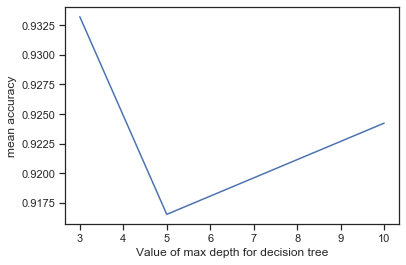

In [65]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import  matplotlib.pyplot as plt

iris = load_iris()
x=iris.data
y=iris.target
x_train4, x_test4, y_train4, y_test4=train_test_split(x, y, test_size=0.2, random_state=42)
c_range=[3, 5, 10,None ]
c_score=[]

for c in c_range:
    dclf = tree.DecisionTreeClassifier(max_depth=c)
    dclf.fit(x_train4, y_train4)
    scores=cross_val_score(dclf,x_train4, y_train4,cv=10)
    c_score.append(scores.mean())

print(c_score)

plt.plot(c_range, c_score)
plt.xlabel('Value of max depth for decision tree')
plt.ylabel('mean accuracy')
plt.show()

In [66]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth=3).fit(x_train4, y_train4)

print('Accuracy of Decision Tree classifier on training set: {:.5f}'
     .format(dt_clf.score(x_train4, y_train4)))
print('Accuracy of Decision Tree classifier on test set: {:.5f}'
     .format(dt_clf.score(x_test4, y_test4)))

Accuracy of Decision Tree classifier on training set: 0.95833
Accuracy of Decision Tree classifier on test set: 1.00000


From the plot above , we can conclude that the best max_depth parameter for the Decision Tree classifier is 3, and the accuracy of the model is 95.83% on the training set and is 100% on the test set.

## 2. Random Forest

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import  matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
x=iris.data
y=iris.target
x_train5, x_test5, y_train5, y_test5=train_test_split(x, y, test_size=0.2, random_state=42)


RFtrees = {0:5, 1:10, 2:50, 3:150, 4:200}
RFdepth = {0:3, 1:5, 2:10, 3:None}
RFmatrix = np.mat(np.zeros((len(RFtrees),len(RFdepth) )))
print(np.shape(RFmatrix))

(5, 4)


In [55]:

for c in RFdepth.keys():
    for n in RFtrees.keys():
        rfclf = RandomForestClassifier(n_estimators=RFtrees[n], max_depth=RFdepth[c])
        rfclf.fit(x_train5, y_train5)
        scores=cross_val_score(rfclf,x_train5, y_train5,cv=10)
        RFmatrix[n,c] = np.mean(scores)
        
RFmatrix

matrix([[0.93321678, 0.93321678, 0.93257576, 0.9247669 ],
        [0.94155012, 0.93257576, 0.93321678, 0.92488345],
        [0.94155012, 0.92488345, 0.92488345, 0.93321678],
        [0.94155012, 0.93321678, 0.93321678, 0.93321678],
        [0.94155012, 0.93321678, 0.92488345, 0.93321678]])

In [57]:
RFmeanscores = pd.DataFrame(RFmatrix,columns=RFdepth.values(),index=RFtrees.values())
RFmeanscores

,3,5,10,NaN
5,0.933217,0.933217,0.932576,0.924767
10,0.941550,0.932576,0.933217,0.924883
50,0.941550,0.924883,0.924883,0.933217
150,0.941550,0.933217,0.933217,0.933217
200,0.941550,0.933217,0.924883,0.933217


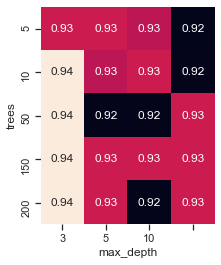

In [58]:
import seaborn as sns

heatplot=sns.heatmap(RFmeanscores, square=True, annot=True,cbar=False)
bottom, top = heatplot.get_ylim()
heatplot.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('max_depth')
plt.ylabel('trees');

In [67]:
RFclf10 = RandomForestClassifier(n_estimators=10, max_depth=3).fit(x_train5, y_train5)
print('Accuracy of Random Forest classifier on training set when n=10 : {:.5f}'
     .format(RFclf10.score(x_train5, y_train5)))
print('Accuracy of Random Forest classifier on test set when n=10: {:.5f}'
     .format(RFclf10.score(x_test5, y_test5)))

RFclf50 = RandomForestClassifier(n_estimators=50, max_depth=3).fit(x_train5, y_train5)
print('Accuracy of Random Forest classifier on training set when n=50: {:.5f}'
     .format(RFclf50.score(x_train5, y_train5)))
print('Accuracy of Random Forest classifier on test set when n=50: {:.5f}'
     .format(RFclf50.score(x_test5, y_test5)))

RFclf150 = RandomForestClassifier(n_estimators=150, max_depth=3).fit(x_train5, y_train5)
print('Accuracy of Random Forest classifier on training set when n=150: {:.5f}'
     .format(RFclf150.score(x_train5, y_train5)))
print('Accuracy of Random Forest classifier on test set when n=150: {:.5f}'
     .format(RFclf150.score(x_test5, y_test5)))

RFclf200 = RandomForestClassifier(n_estimators=200, max_depth=3).fit(x_train5, y_train5)
print('Accuracy of Random Forest classifier on training set when n=200: {:.5f}'
     .format(RFclf200.score(x_train5, y_train5)))
print('Accuracy of Random Forest classifier on test set when n=200: {:.5f}'
     .format(RFclf200.score(x_test5, y_test5)))

Accuracy of Random Forest classifier on training set when n=10 : 0.96667
Accuracy of Random Forest classifier on test set when n=10: 1.00000
Accuracy of Random Forest classifier on training set when n=50: 0.95000
Accuracy of Random Forest classifier on test set when n=50: 1.00000
Accuracy of Random Forest classifier on training set when n=150: 0.95833
Accuracy of Random Forest classifier on test set when n=150: 1.00000
Accuracy of Random Forest classifier on training set when n=200: 0.95833
Accuracy of Random Forest classifier on test set when n=200: 1.00000


From results above, we can find out that when n_estimators= 10 the accuracy difference between train set and test set is smallest. So the best max_depth parameter is 3, the best number of trees parameter is 10, and the accuracy of the model is 96.67% on the training set and is 100% on the test set.

## 3.Gradient Tree Boosting

[0.9325757575757574, 0.9325757575757574, 0.9248834498834497, 0.9165501165501164, 0.9165501165501164]


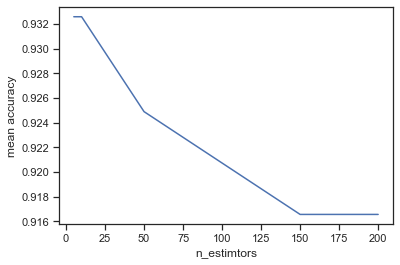

In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import  matplotlib.pyplot as plt

iris = load_iris()
x=iris.data
y=iris.target
x_train6, x_test6, y_train6, y_test6=train_test_split(x, y, test_size=0.2, random_state=42)
c_range=[5, 10, 50, 150, 200 ]
c_score=[]

for c in c_range:
    gclf = GradientBoostingClassifier(n_estimators=c)
    gclf.fit(x_train6, y_train6)
    scores=cross_val_score(gclf,x_train6, y_train6,cv=10)
    c_score.append(scores.mean())

print(c_score)

plt.plot(c_range, c_score)
plt.xlabel('n_estimtors')
plt.ylabel('mean accuracy')
plt.show()

In [69]:
GBclf5 = GradientBoostingClassifier(n_estimators=5).fit(x_train, y_train)

print('Accuracy of Gradient Boosting classifier on training set when n=5: {:.5f}'
     .format(GBclf5.score(x_train6, y_train6)))
print('Accuracy of Gradient Boosting classifier on test set when n=5: {:.5f}'
     .format(GBclf5.score(x_test6, y_test6)))

GBclf10 = GradientBoostingClassifier(n_estimators=10).fit(x_train, y_train)

print('Accuracy of Gradient Boosting classifier on training set when n=10: {:.5f}'
     .format(GBclf10.score(x_train6, y_train6)))
print('Accuracy of Gradient Boosting classifier on test set when n=10: {:.5f}'
     .format(GBclf10.score(x_test6, y_test6)))

Accuracy of Gradient Boosting classifier on training set when n=5: 0.97500
Accuracy of Gradient Boosting classifier on test set when n=5: 1.00000
Accuracy of Gradient Boosting classifier on training set when n=10: 0.98333
Accuracy of Gradient Boosting classifier on test set when n=10: 1.00000


From results above, we can find out that when n_estimators= 10 the accuracy difference between train set and test set is smaller. So the best n_estimator parameter is 10, and the accuracy of the model is 98.333% on the training set and is 100% on the test set.

# Question 5 : Analysis

1.  **Explain why you had to split the dataset into train and test sets?

When we train a model using the dataset, Our ultimate goal is to apply the trained model to a real environment. We hope that the trained model can get good prediction results on real data which means a low generalization error. The lower the generalization error of the trained model, the better.
    
Spliting the dataset into train and tetst sets is a way to estimate the generalization error and understand model's generalization ability.We can use the data from the training set to train the model, and then use the error on the test set as the generalization error of the final model in dealing with real-world scenarios. With the test set, if we want to verify the final effect of the model, we only need to calculate the error of the trained model on the test set, and we can consider this error to be an approximation of the generalization error. Getting a minimum error of the trained model on the test set could mean our trained model has achieved a minimum generalization error.
    
2.  **Explain why when finding the best parameters for KNN you didn't evaluate directly on the test set and had to use a validation test.
    
The test set is used to evaluate the trained model's generalization ability, if we use it to find best parameters then we might get a lower approximation of the generalization error than the actual one so that it could not reflect the actual generalization ability. Because when we changing value of parameters and evaluating them on test set,the error of the trained model on the test set might get smaller based on this test set but the error of the trained model on other real environment dataset is not necessarily small in the same way. Using validation set to try different parameters and find the best parameters could avoid this problem. Validation set is used to evaluate the model and find best parameters, test set is used to evaluate the generalization ability of trained model.
    
3.  **What  was  the  effect  of  changing k for  KNN.  Was  the  accuracy  always affected  the  same  way  with  an  increase  of k?   Why  do  you  think  this happened?
    
The changing of k for KNN affects the accuracy of trained model. When increasing the value of k from 1 to 35, the accuracy is increasing first and then decreasing when k is greater than 30. This is because that a smaller K value means that only training examples that are closer to the input instance will have an effect on the prediction result, which is prone to overfitting and low accuracy; if the K value is large, the advantage is that it can reduce the estimation error of learning, and the disadvantage is the increase of approximate error of learning , at this time, training examples that are far away from the input instance will also play a role in the prediction, and the prediction will be wrong and same low accuracy. 
    
So there would be a critical point of k value that could balance approximate error and estimation error. In this case the critical point of k is 30, when K is smaller or greater than 30, the accuracy of model will both be smaller.
    
4.  **What was the relative effect of changing the max depths for decision tree and random forests?  Explain the reason for this.
   
The max depth limits the maximum depth that the tree is allowed to grow to. The deeper it tree grows, the more complex the model will become. If the max depth is too high, the decision tree model would be overfitting that captures too many patterns including less useful ones. And this would lead to low model accuracy and high testing error.
    
But if the max_depth is too low, it might result in the underfit problem of the tree model without capturing enough useful patterns. This will also lead to high testing error and low model accuracy.
    
5.  **Comment  on  the  effect  of  the  number  of  estimators  for  Gradient  Tree Boosting and what was the relative effect performance of gradient boosting compared with random forest.  Explain the reason for this.

In gradient boosting, the larger number of estimators will lead to larger number of trees because the number of trees grown in gradient boosting classifier equals to n classes mutiply by n estimators. When number of estimators increase from small value to larger one, it could improve the model and has less error. But when the number of estimators is too large compared to the dataset size,it would not improve the model any more and decrease accuracy. Because computational cost is large than the benefit in accuracy.

Random forests and gradient boosting are all ensemble methods, but gradient boosting is based on boosting that is performed sequentially. The gradient boosting will build a series of trees. When a tree is trained, it attempts to correct mistakes of the previous tree in the series by adding higher weights to incorrect part. However, the random forest method is based on bagging,  randomly  building n number of different trees in parallel and then randomly choosing features to train each tree and finally combining results from all n trees.

For Random forests the accuracy is the average over many trees created through bagging. Similarly,the accuracy incease as the number of tress increase , but at a certain point the cost of computing large number of trees will be higher than the benefit in accuracy. so the accuracy will decrease.
    
6.  **What does the parameter C define in the SVM classifier?  What effect did you observe and why do you think this happened?
    
Parameter C is a penalty term that is used to control the hinge loss function. You can understand this parameter C as the weight of adjusting the preferences of the two indicators (interval size, classification accuracy) in the optimization direction. 
    
I have observed in Question 3 that the accuracy is low when the value of c is small, and  as the c increase accuracy of model increase gradually.But when c is getting larger and larger the accuracy decreases after a critical point. This is because as a penalty term when c is large, less margin violation is allowed and it might lead to overfitting and when c is small the margin size is larger with more margin violation so it might lead to underfitting. So between c is too large and too small there is a critical point that has highest model accuracy.